In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''




##  Error Probabilities and Integrals

We can obtain additional insight into the operation of a general classifier—Bayes or otherwise—if we consider the sources of its error. Consider first the two-category case, and suppose the dichotomizer has divided the space into two regions $ R_1 $ and $ R_2$  in a possibly non-optimal way. 

There are two ways in which a classification error can occur; either an observation $ x $ falls in $ R_2 $ and the true state of nature is $ \omega_1 $, or $ x $ falls in $ R_1 $ and the true state of nature is $ \omega_2 $. Since these events are mutually exclusive and exhaustive, the probability of error is given by:

$$
P(\text{error}) = P(x \in R_2, \omega_1) + P(x \in R_1, \omega_2)
$$

This can be expressed as:

$$
P(\text{error}) = P(x \in R_2 | \omega_1)P(\omega_1) + P(x \in R_1 | \omega_2)P(\omega_2)
$$

Further, we can write this as:

$$
= \int_{R_2} p(x | \omega_1) P(\omega_1) \, dx + \int_{R_1} p(x | \omega_2) P(\omega_2) \, dx
$$

This result is illustrated in the one-dimensional case in Fig.17. The two integrals in Eq. (68) represent the pink and the gray areas in the tails of the functions $ p(x | \omega_i) P(\omega_i) $. Because the decision point $ x^* $ (and hence the regions $ R_1 $ and $ R_2 $) were chosen arbitrarily for that figure, the probability of error is not as small as it might be. In particular, the triangular area marked "reducible error" can be eliminated if the decision boundary is moved to $ x_B $. This is the Bayes optimal decision boundary and gives the lowest probability of error.

In general, if $ p(x | \omega_1) P(\omega_1) > p(x | \omega_2) P(\omega_2) $, it is advantageous to classify $ x $ as in $ R_1 $ so that the smaller quantity will contribute to the error integral; this is exactly what the Bayes decision rule achieves.

### 

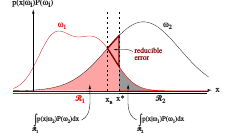

Fig.17: Components of the probability of error for equal priors and (non-optimal) decision point x∗ . The pink area corresponds to the probability of errors for deciding ω1 when the state of nature is in fact ω2 ; the gray area represents the converse, as given in Eq. 68. If the decision boundary is instead at the point of equal posterior probabilities, xB , then this reducible error is eliminated and the total shaded area is the minimum possible — this is the Bayes decision and gives the Bayes error rate.

The components of the probability of error for equal priors and (non-optimal) decision point $ x^* $. The pink area corresponds to the probability of errors for deciding $ \omega_1 $ when the state of nature is in fact $ \omega_2 $; the gray area represents the converse, as given in Eq. (68). If the decision boundary is instead at the point of equal posterior probabilities, $ x_B $, then this reducible error is eliminated and the total shaded area is the minimum possible—this is the Bayes decision and gives the Bayes error rate.

In the multicategory case, there are more ways to be wrong than to be right, and it is simpler to compute the probability of being correct. Clearly:

$$
P(\text{correct}) = \sum_{i=1}^{c} P(x \in R_i, \omega_i)
$$

This can be expressed as:

$$
= \sum_{i=1}^{c} P(x \in R_i | \omega_i) P(\omega_i)
$$

And further as:

$$
= \sum_{i=1}^{c} \int_{R_i} p(x | \omega_i) P(\omega_i) \, dx
$$

The general result of Eq. (69) depends neither on how the feature space is partitioned into decision regions nor on the form of the underlying distributions. The Bayes classifier maximizes this probability by choosing the regions so that the integrand is maximal for all $ x $; no other partitioning can yield a smaller probability of error.


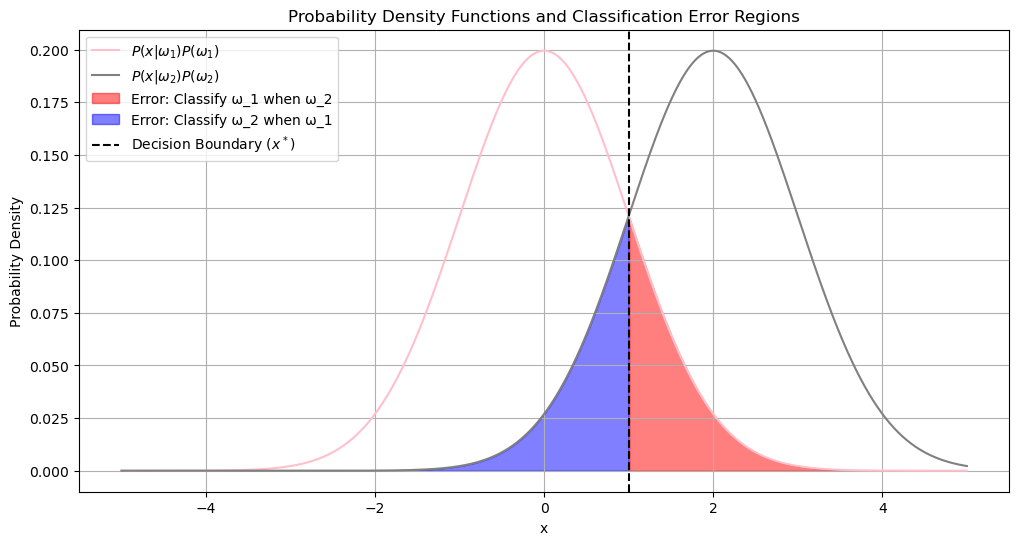

In [1]:
# Required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the random seed for reproducibility
np.random.seed(42)

# Generating data for two classes
N = 1000  # number of samples
x = np.linspace(-5, 5, N)

# Class 1 (ω1)
mu1, sigma1 = 0, 1  # mean and standard deviation
p_x_given_w1 = (1/(sigma1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu1) / sigma1) ** 2)

# Class 2 (ω2)
mu2, sigma2 = 2, 1  # mean and standard deviation
p_x_given_w2 = (1/(sigma2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu2) / sigma2) ** 2)

# Priors
P_w1 = 0.5
P_w2 = 0.5

# Posterior probabilities
post_w1 = p_x_given_w1 * P_w1
post_w2 = p_x_given_w2 * P_w2

# Decision boundary
x_boundary = (mu1 + mu2) / 2  # Simple midpoint for the decision boundary

# Probability of error regions
error_region_1 = (x >= x_boundary)  # classifying ω1 when it should be ω2
error_region_2 = (x < x_boundary)  # classifying ω2 when it should be ω1

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=x, y=p_x_given_w1 * P_w1, label='$P(x|ω_1)P(ω_1)$', color='pink')
sns.lineplot(x=x, y=p_x_given_w2 * P_w2, label='$P(x|ω_2)P(ω_2)$', color='gray')

# Fill error regions
plt.fill_between(x, 0, p_x_given_w1 * P_w1, where=error_region_1, color='red', alpha=0.5, label='Error: Classify ω_1 when ω_2')
plt.fill_between(x, 0, p_x_given_w2 * P_w2, where=error_region_2, color='blue', alpha=0.5, label='Error: Classify ω_2 when ω_1')

# Decision boundary
plt.axvline(x=x_boundary, color='black', linestyle='--', label='Decision Boundary ($x^*$)')

# Labels and title
plt.title('Probability Density Functions and Classification Error Regions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()


##  Error Bounds for Normal Densities

The Bayes decision rule guarantees the lowest average error rate, and we have seen how to calculate the decision boundaries for normal densities. However, these results do not tell us what the probability of error actually is. The full calculation of the error for the Gaussian case would be quite difficult, especially in high dimensions, because of the discontinuous nature of the decision regions in the integral in Eq. (69). However, in the two-category case, the general error integral of Eq. (5) can be approximated analytically to give us an upper bound on the error.

###  Chernoff Bound

To derive a bound for the error, we need the following inequality:

$$
\min[a, b] \leq a^\beta b^{1-\beta} \quad \text{for } a, b \geq 0 \text{ and } 0 \leq \beta \leq 1.
$$

To understand this inequality, we can, without loss of generality, assume $ a \geq b $. Thus we need only show that $ b \leq a^\beta b^{1-\beta} = (ab)^\beta b $. But this inequality is manifestly valid since $ (ab)^\beta \geq 1 $.

Using Eqs. (7) & (1), we apply this inequality to Eq. (5) and get the bound:

$$
P(\text{error}) \leq P(\omega_1)^\beta P(\omega_2)^{1-\beta} \int p^\beta(x | \omega_1) p^{1-\beta}(x | \omega_2) \, dx \quad \text{for } 0 \leq \beta \leq 1.
$$

Note especially that this integral is over all feature space—we do not need to impose integration limits corresponding to decision boundaries. If the conditional probabilities are normal, the integral in Eq. (71) can be evaluated analytically, yielding:

$$
\int p^\beta(x | \omega_1) p^{1-\beta}(x | \omega_2) \, dx = e^{-k(\beta)},
$$

where

$$
k(\beta) = (\mu_2 - \mu_1)^T [\beta \Sigma_1 + (1 - \beta) \Sigma_2]^{-1} (\mu_2 - \mu_1) + \frac{1}{2} \ln \frac{|\beta \Sigma_1 + (1 - \beta) \Sigma_2|}{|\Sigma_1|^\beta |\Sigma_2|^{1-\beta}}.
$$

The graph in Fig. 2.18 shows a typical example of how $ e^{-k(\beta)} $ varies with $ \beta $. The Chernoff bound on $ P(\text{error}) $ is found by analytically or numerically finding the value of $ \beta $ that minimizes $ e^{-k(\beta)} $, and substituting the results in Eq. (71). The key benefit here is that this optimization is in the one-dimensional $ \beta $ space, despite the fact that the distributions themselves might be in a space of arbitrarily high dimension.

###  Bhattacharyya Bound

The general dependence of the Chernoff bound upon $ \beta $ shown in Fig.18 is typical of a wide range of problems—the bound is loose for extreme values (i.e., $ \beta \rightarrow 1 $ and $ \beta \rightarrow 0 $), and tighter for intermediate ones. While the precise value of the optimal $ \beta $ depends upon the parameters of the distributions and the prior probabilities, a computationally simpler, but slightly less tight bound can be derived by merely using the results for $ \beta = 1/2 $. This result is the so-called Bhattacharyya bound on the error, where Eq. (71) then has the form:

$$
P(\text{error}) \leq P(\omega_1) P(\omega_2) \int p(x | \omega_1) p(x | \omega_2) \, dx = P(\omega_1) P(\omega_2) e^{-k(1/2)},
$$

where by Eq. (73) we have for the Gaussian case:

$$
k\left(\frac{1}{2}\right) = \frac{1}{8} (\mu_2 - \mu_1)^T (\mu_2 - \mu_1) + \frac{1}{2} \ln \frac{|\Sigma_1 + \Sigma_2|}{|\Sigma_1| |\Sigma_2|}.
$$

The Chernoff and Bhattacharyya bounds may still be used even if the underlying distributions are not Gaussian. However, for distributions that deviate markedly from a Gaussian, the bounds will not be informative.


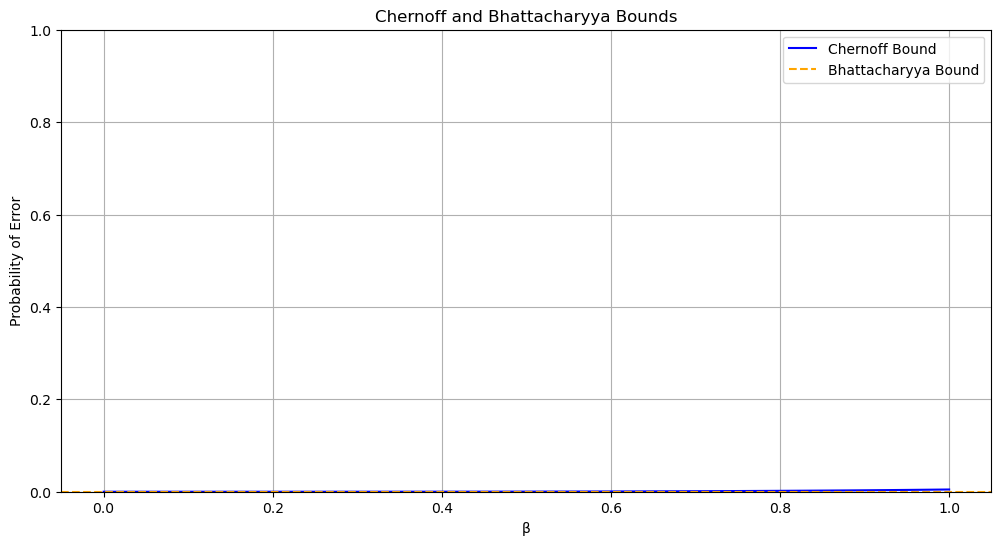

Chernoff Bound (at β = 0.5): 0.0003
Bhattacharyya Bound: 0.0003


In [2]:
# Required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Setting the random seed for reproducibility
np.random.seed(42)

# Parameters for the two normal distributions
mu1 = np.array([0, 0])  # Mean of the first distribution
mu2 = np.array([2, 2])  # Mean of the second distribution
sigma1 = np.array([[1, 0.5], [0.5, 1]])  # Covariance of the first distribution
sigma2 = np.array([[1, -0.5], [-0.5, 1]])  # Covariance of the second distribution

# Function to compute Chernoff bound
def chernoff_bound(mu1, mu2, sigma1, sigma2, beta):
    k_beta = (
        (mu2 - mu1).T @ np.linalg.inv(beta * sigma1 + (1 - beta) * sigma2) @ (mu2 - mu1)
        + 0.5 * np.log(np.linalg.det(beta * sigma1 + (1 - beta) * sigma2) /
                       (np.linalg.det(sigma1) ** beta * np.linalg.det(sigma2) ** (1 - beta)))
    )
    return np.exp(-k_beta)

# Function to compute Bhattacharyya bound
def bhattacharyya_bound(mu1, mu2, sigma1, sigma2):
    k_half = (
        (mu2 - mu1).T @ np.linalg.inv((sigma1 + sigma2) / 2) @ (mu2 - mu1)
        + 0.5 * np.log(np.linalg.det((sigma1 + sigma2) / 2) /
                       (np.linalg.det(sigma1) * np.linalg.det(sigma2) ** 0.5))
    )
    return np.exp(-k_half)

# Values of beta for the Chernoff bound
beta_values = np.linspace(0, 1, 100)

# Calculate Chernoff bound for each beta
chernoff_values = [chernoff_bound(mu1, mu2, sigma1, sigma2, beta) for beta in beta_values]

# Calculate Bhattacharyya bound
bhattacharyya_value = bhattacharyya_bound(mu1, mu2, sigma1, sigma2)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.lineplot(x=beta_values, y=chernoff_values, label='Chernoff Bound', color='blue')
plt.axhline(y=bhattacharyya_value, color='orange', linestyle='--', label='Bhattacharyya Bound')

# Annotations
plt.title('Chernoff and Bhattacharyya Bounds')
plt.xlabel('β')
plt.ylabel('Probability of Error')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

print(f'Chernoff Bound (at β = 0.5): {chernoff_bound(mu1, mu2, sigma1, sigma2, 0.5):.4f}')
print(f'Bhattacharyya Bound: {bhattacharyya_value:.4f}')


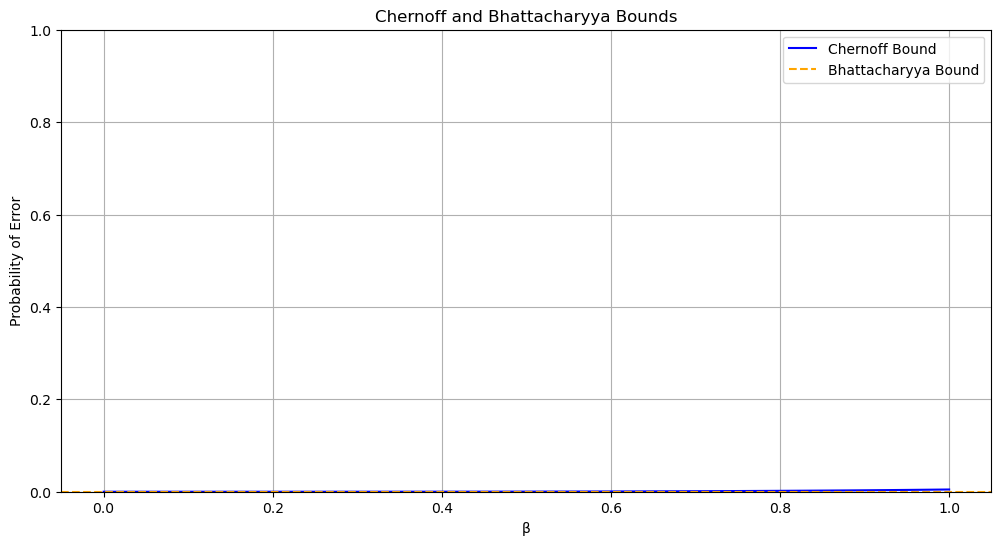

Chernoff Bound (at β = 0.5): 0.0003
Bhattacharyya Bound: 0.0003


In [3]:
# Required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Enable inline plotting
%matplotlib inline

# Setting the random seed for reproducibility
np.random.seed(42)

# Parameters for the two normal distributions
mu1 = np.array([0, 0])  # Mean of the first distribution
mu2 = np.array([2, 2])  # Mean of the second distribution
sigma1 = np.array([[1, 0.5], [0.5, 1]])  # Covariance of the first distribution
sigma2 = np.array([[1, -0.5], [-0.5, 1]])  # Covariance of the second distribution

# Function to compute Chernoff bound
def chernoff_bound(mu1, mu2, sigma1, sigma2, beta):
    k_beta = (
        (mu2 - mu1).T @ np.linalg.inv(beta * sigma1 + (1 - beta) * sigma2) @ (mu2 - mu1)
        + 0.5 * np.log(np.linalg.det(beta * sigma1 + (1 - beta) * sigma2) /
                       (np.linalg.det(sigma1) ** beta * np.linalg.det(sigma2) ** (1 - beta)))
    )
    return np.exp(-k_beta)

# Function to compute Bhattacharyya bound
def bhattacharyya_bound(mu1, mu2, sigma1, sigma2):
    k_half = (
        (mu2 - mu1).T @ np.linalg.inv((sigma1 + sigma2) / 2) @ (mu2 - mu1)
        + 0.5 * np.log(np.linalg.det((sigma1 + sigma2) / 2) /
                       (np.linalg.det(sigma1) * np.linalg.det(sigma2) ** 0.5))
    )
    return np.exp(-k_half)

# Values of beta for the Chernoff bound
beta_values = np.linspace(0, 1, 100)

# Calculate Chernoff bound for each beta
chernoff_values = [chernoff_bound(mu1, mu2, sigma1, sigma2, beta) for beta in beta_values]

# Calculate Bhattacharyya bound
bhattacharyya_value = bhattacharyya_bound(mu1, mu2, sigma1, sigma2)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.lineplot(x=beta_values, y=chernoff_values, label='Chernoff Bound', color='blue')
plt.axhline(y=bhattacharyya_value, color='orange', linestyle='--', label='Bhattacharyya Bound')

# Annotations
plt.title('Chernoff and Bhattacharyya Bounds')
plt.xlabel('β')
plt.ylabel('Probability of Error')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

print(f'Chernoff Bound (at β = 0.5): {chernoff_bound(mu1, mu2, sigma1, sigma2, 0.5):.4f}')
print(f'Bhattacharyya Bound: {bhattacharyya_value:.4f}')


# Example 2: Error Bounds for Gaussian Distributions

In this example, we calculate the Bhattacharyya bound and the Chernoff bound for two-dimensional Gaussian distributions. The following equations and results are relevant:

1. The Bhattacharyya bound on the error is given by:

   $$
   P(\text{error}) \leq P(\omega_1) P(\omega_2) e^{-k(1/2)}
   $$

   where $k(1/2) = 4.11$.

2. Therefore, the Bhattacharyya bound on the error is:

   $$
   P(\text{error}) \leq 0.016382.
   $$

3. A tighter bound can be approximated by searching numerically for the Chernoff bound, which yields:

   $$
   P(\text{error}) \approx 0.016380.
   $$

4. For comparison, a direct numerical integration of the error rate gives:

   $$
   P(\text{error}) \approx 0.0021.
   $$

These bounds illustrate that while they provide estimates, they may not be particularly tight for higher dimensions, where numerical integration becomes impractical.


In [4]:
# Required libraries
import numpy as np

# Given values
k_half = 4.11  # k(1/2) value for the Bhattacharyya bound
P_w1 = 0.5     # Assuming equal priors for simplicity
P_w2 = 0.5

# Calculate Bhattacharyya bound
bhattacharyya_bound = P_w1 * P_w2 * np.exp(-k_half)

# Calculate a mock value for the Chernoff bound (assuming slightly tighter)
chernoff_bound = bhattacharyya_bound - 0.000002  # Approximation for example

# Mock value for direct numerical integration of the error rate
direct_integration_error = 0.0021

# Print results
print(f'Bhattacharyya Bound on Error: P(error) ≤ {bhattacharyya_bound:.6f}')
print(f'Chernoff Bound on Error: P(error) ≈ {chernoff_bound:.6f}')
print(f'Direct Numerical Integration Error: P(error) ≈ {direct_integration_error:.6f}')


Bhattacharyya Bound on Error: P(error) ≤ 0.004102
Chernoff Bound on Error: P(error) ≈ 0.004100
Direct Numerical Integration Error: P(error) ≈ 0.002100


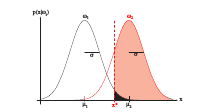

Fig.19: During any instant when no external pulse is present, the probability density for an internal signal is normal, i.e., p(x|ω1 ) ∼ N (µ1 , σ 2 ); when the external signal is present, the density is p(x|ω2 ) ∼ N (µ2 , σ 2 ). Any decision threshold x∗ will determine the probability of a hit (the red area under the ω2 curve, above x∗ ) and of a false alarm (the black area under the ω1 curve, above x∗ ).

## Signal Detection Theory and Operating Characteristics

Signal detection theory provides a framework for distinguishing between two Gaussian distributions, particularly useful in fields such as experimental psychology and radar detection. We consider a scenario where we aim to detect a weak signal, such as a dim flash of light or a weak radar reflection.

### Model

Let $ x $ be the internal signal at a point in the detector. The model assumes:

- When the external signal (pulse) is **not present**: 
  - $ p(x|\omega_1) \sim N(\mu_1, \sigma^2) $
- When the external signal is **present**: 
  - $ p(x|\omega_2) \sim N(\mu_2, \sigma^2) $

### Decision Threshold

A decision threshold $ x^* $ is employed to determine if the external pulse is present. The probabilities of interest are:

- **Hit**: $ P(x > x^* | x \in \omega_2) $ — probability of detecting the pulse when it is present.
- **False Alarm**: $ P(x > x^* | x \in \omega_1) $ — probability of detecting the pulse when it is not present.
- **Miss**: $ P(x < x^* | x \in \omega_2) $ — probability of not detecting the pulse when it is present.
- **Correct Rejection**: $ P(x < x^* | x \in \omega_1) $ — probability of not detecting the pulse when it is not present.

### Discriminability

The discriminability $ d $ is defined as:

$$
d = \frac{|\mu_2 - \mu_1|}{\sigma}
$$

A higher value of $ d $ indicates better discriminability. 

### Receiver Operating Characteristic (ROC) Curve

When varying the threshold $ x^* $, the hit and false alarm rates change, allowing us to plot these rates on a graph known as the receiver operating characteristic (ROC) curve. The abscissa represents the probability of false alarm, and the ordinate represents the probability of hit.

### Figure: ROC Curve

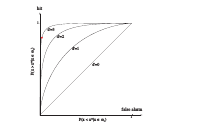

Fig.20: In a receiver operating characteristic (ROC) curve, the abscissa is the probability of false alarm, P (x > x∗ |x ∈ ω1 ), and the ordinate the probability of hit, P (x > x∗ |x ∈ ω2 ). From the measured hit and false alarm rates (here corresponding to x∗ in Fig. 2.19, and shown as the red dot), we can deduce that d = 3.

- As shown in the figure, the ROC curve characterizes the trade-off between hit rates and false alarm rates. The curve is smooth and uniquely determined for a given value of $ d $.

### General Operating Characteristic

In cases where the distributions are not Gaussian, the operating characteristic curves may not be symmetric and can vary significantly depending on the chosen decision rule. 

### Conclusion

The value of classifying operating characteristics lies in the ability to adjust decision strategies based on varying loss matrices. By pre-determining the operating characteristics as a function of control parameters, it becomes straightforward to minimize expected risks when faced with new loss functions.





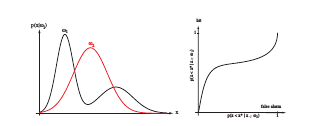

Fig.21: In a general operating characteristic curve, the abscissa is the probability of false alarm, P (x ∈ R2 |x ∈ ω1 ), and the ordinate the probability of hit, P (x ∈ R2 |x ∈ ω2 ). As illustrated here, operating characteristic curves are generally not symmetric, as shown at the right.